## BIPARTITE GRAPHS
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

A bipartite graph consists of two groups of nodes. There are links between nodes of differing groups, but no links among nodes from the same group. Common examples are customers and purchased products or meetups and people attending. Which of the groups a node belongs to can be indicated by the keyword "bipartite" and the corresponding group.


### Packages

In [83]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np
import pandas as pd

Davis Southern Women Graph

In [114]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
c = bipartite.color(G)

### Network Info

In [74]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


The graphs, nodes and edges of the two groups of the bipartite graph can easily be extracted.

In [78]:
women, clubs = bipartite.sets(G)
print("First Group:", women)
print("Second Group:", clubs)

First Group: {'Olivia Carleton', 'Ruth DeSand', 'Myra Liddel', 'Charlotte McDowd', 'Eleanor Nye', 'Pearl Oglethorpe', 'Evelyn Jefferson', 'Theresa Anderson', 'Katherina Rogers', 'Laura Mandeville', 'Brenda Rogers', 'Verne Sanderson', 'Frances Anderson', 'Sylvia Avondale', 'Dorothy Murchison', 'Nora Fayette', 'Helen Lloyd', 'Flora Price'}
Second Group: {'E1', 'E4', 'E14', 'E13', 'E5', 'E3', 'E2', 'E11', 'E12', 'E7', 'E6', 'E9', 'E10', 'E8'}


To represent the bipartite graph, we fix the positions of the nodes according to which group they belong to.

In [102]:
pos = dict()
pos.update( (n, (1,i)) for i, n in enumerate(women) )
pos.update( (n, (2,i)) for i, n in enumerate(clubs) )
num_nodes = G.number_of_nodes()
cmap = plt.get_cmap('Blues')


### Bipartile Graph 1
By creating this graph we are able to understand the amount of events each women attended.
there are some women that stand out from the rest for the amount of events they attended some more than others

* THeresa
* Katherina
* Nora

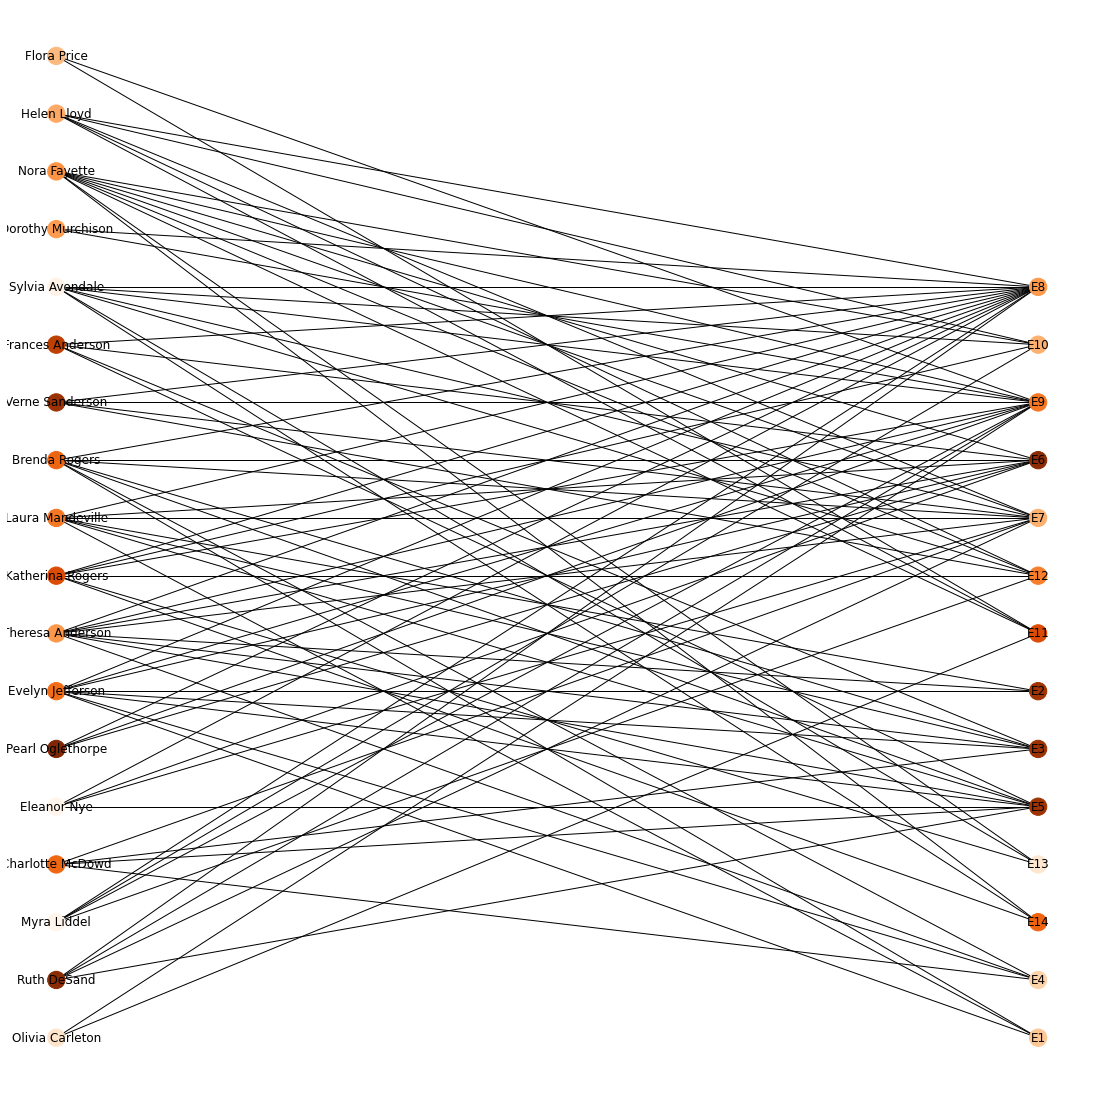

In [118]:
plt.figure(figsize=(15,15))
nx.draw(G,
        pos= pos,
        with_labels=True,
        node_color = np.random.random(num_nodes),
        cmap = plt.get_cmap('Oranges'))
plt.show()

### Relationships
How is the original graph related to the original bipartite graph

In [106]:
G_top = bipartite.projected_graph(G, women)
G_bottom = bipartite.projected_graph(G, clubs)

In [109]:
print(G_bottom.edges())

[('E1', 'E4'), ('E1', 'E5'), ('E1', 'E3'), ('E1', 'E2'), ('E1', 'E7'), ('E1', 'E6'), ('E1', 'E9'), ('E1', 'E8'), ('E4', 'E5'), ('E4', 'E3'), ('E4', 'E2'), ('E4', 'E7'), ('E4', 'E6'), ('E4', 'E9'), ('E4', 'E8'), ('E14', 'E13'), ('E14', 'E12'), ('E14', 'E11'), ('E14', 'E7'), ('E14', 'E6'), ('E14', 'E9'), ('E14', 'E10'), ('E14', 'E8'), ('E13', 'E12'), ('E13', 'E11'), ('E13', 'E7'), ('E13', 'E6'), ('E13', 'E9'), ('E13', 'E10'), ('E13', 'E8'), ('E5', 'E3'), ('E5', 'E2'), ('E5', 'E7'), ('E5', 'E6'), ('E5', 'E9'), ('E5', 'E8'), ('E3', 'E2'), ('E3', 'E7'), ('E3', 'E6'), ('E3', 'E9'), ('E3', 'E8'), ('E2', 'E7'), ('E2', 'E6'), ('E2', 'E9'), ('E2', 'E8'), ('E11', 'E12'), ('E11', 'E7'), ('E11', 'E6'), ('E11', 'E9'), ('E11', 'E10'), ('E11', 'E8'), ('E12', 'E7'), ('E12', 'E6'), ('E12', 'E9'), ('E12', 'E10'), ('E12', 'E8'), ('E7', 'E6'), ('E7', 'E9'), ('E7', 'E10'), ('E7', 'E8'), ('E6', 'E9'), ('E6', 'E10'), ('E6', 'E8'), ('E9', 'E10'), ('E9', 'E8'), ('E10', 'E8')]


### Women

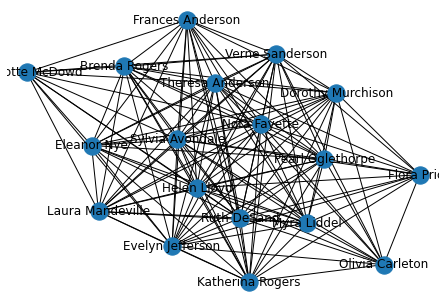

In [110]:
nx.draw(G_top, with_labels=True)

### Events

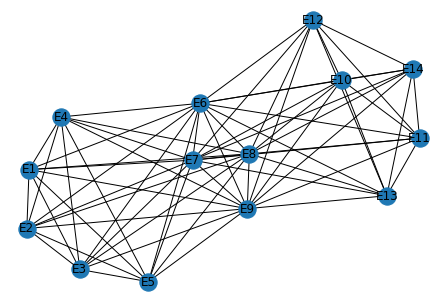

In [111]:
nx.draw(G_bottom, with_labels=True)

## Centrality Measures
### Betweenness Centrality

In [144]:
bc = nx.betweenness_centrality(G)
df_bc = pd.DataFrame.from_dict({
        'node': list(bc.keys()),
        'betweenness': list(bc.values())
})
df_bc.sort_values('betweenness', ascending=False)

,node,betweenness
25,E8,0.237003
26,E9,0.219209
24,E7,0.125881
13,Nora Fayette,0.108581
0,Evelyn Jefferson,0.092431
2,Theresa Anderson,0.083827
12,Sylvia Avondale,0.068625
23,E6,0.063199
1,Laura Mandeville,0.049149
3,Brenda Rogers,0.047358


### Closeness Centrality

In [138]:
cc = nx.closeness_centrality(G)
df_cc = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'closeness': list(cc.values())
})
df_cc.sort_values('closeness', ascending=True)

,node,closeness
31,E14,0.369048
19,E2,0.369048
18,E1,0.369048
30,E13,0.369048
28,E11,0.378049
21,E4,0.378049
17,Flora Price,0.378049
16,Olivia Carleton,0.378049
27,E10,0.387500
4,Charlotte McDowd,0.387500


### Degree Centrality

In [154]:
dc = nx.degree_centrality(G)
df_dc = pd.DataFrame.from_dict({
        'node': list(dc.keys()),
        'degree': list(dc.values())
})
df_dc.sort_values('degree', ascending=False)

,node,degree
25,E8,0.451613
26,E9,0.387097
24,E7,0.322581
23,E6,0.258065
22,E5,0.258065
13,Nora Fayette,0.258065
0,Evelyn Jefferson,0.258065
2,Theresa Anderson,0.258065
1,Laura Mandeville,0.225806
3,Brenda Rogers,0.225806


### Summary

In [148]:
summary_df = pd.concat([df_bc,df_cc,df_dc], axis=1)
summary_df

,node,betweenness,node,closeness,node,degree
0,Evelyn Jefferson,0.092431,Evelyn Jefferson,0.516667,Evelyn Jefferson,0.258065
1,Laura Mandeville,0.049149,Laura Mandeville,0.469697,Laura Mandeville,0.225806
2,Theresa Anderson,0.083827,Theresa Anderson,0.516667,Theresa Anderson,0.258065
3,Brenda Rogers,0.047358,Brenda Rogers,0.469697,Brenda Rogers,0.225806
4,Charlotte McDowd,0.010140,Charlotte McDowd,0.387500,Charlotte McDowd,0.129032
5,Frances Anderson,0.010254,Frances Anderson,0.430556,Frances Anderson,0.129032
6,Eleanor Nye,0.009038,Eleanor Nye,0.430556,Eleanor Nye,0.129032
7,Pearl Oglethorpe,0.006508,Pearl Oglethorpe,0.430556,Pearl Oglethorpe,0.096774
8,Ruth DeSand,0.016061,Ruth DeSand,0.455882,Ruth DeSand,0.129032
9,Verne Sanderson,0.015061,Verne Sanderson,0.455882,Verne Sanderson,0.129032


### Centrality Graphs

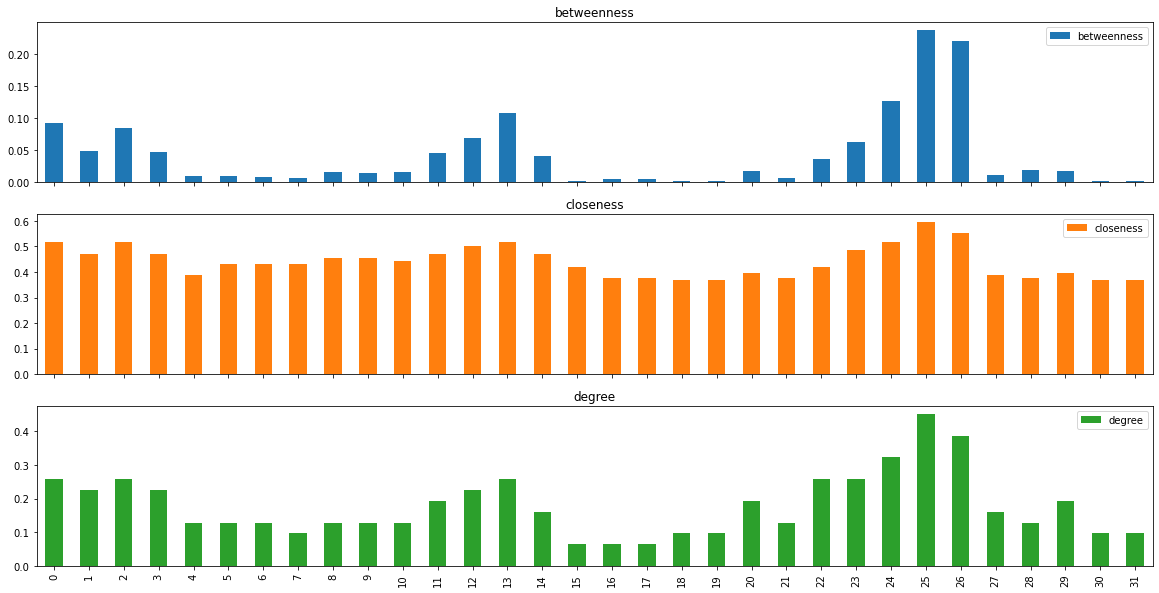

In [153]:
viz = summary_df.plot.bar(rot=90, subplots=True, figsize=(20,10))

## Hierarchical Clustering

In [161]:
cluster = bipartite.average_clustering(G)
cluster

0.32848583600481696

In [159]:
cluster_top = bipartite.average_clustering(G, G_top)
cluster_top

0.31713992384771866

In [160]:
cluster_bottom = bipartite.average_clustering(G, G_bottom)
cluster_bottom

0.3430734373496574

### Block Model
A block model is a simplified network derived from the original network, where all
nodes in a cluster are considered a single node, and all relationships between original
nodes become aggregated into relationships between blocks.


Original Graph


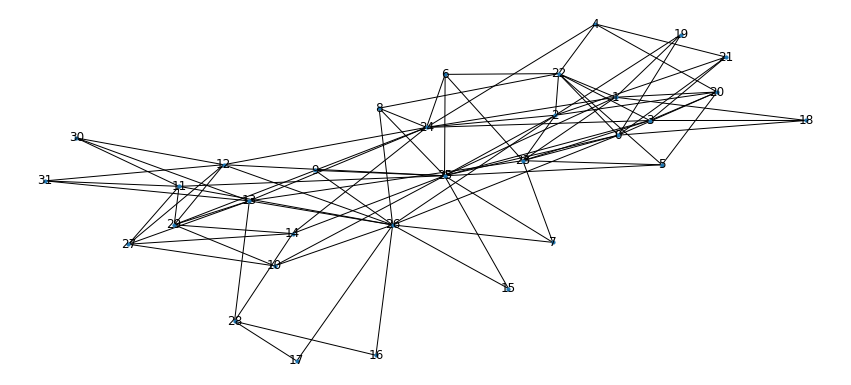

In [173]:
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance


def create_hc(G):
        """Creates hierarchical cluster of graph G from distance matrix"""
        path_length = nx.all_pairs_shortest_path_length(G)
        distances = np.zeros((len(G), len(G)))
        for u, p in path_length:
                for v, d in p.items():
                        distances[u][v] = d
        # Create hierarchical cluster
        Y = distance.squareform(distances)
        Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
        # This partition selection is arbitrary, for illustrive purposes
        membership = list(hierarchy.fcluster(Z, t=1.15))
        # Create collection of lists for blockmodel
        partition = defaultdict(list)
        for n, p in zip(list(range(len(G))), membership):
                partition[p].append(n)
        return list(partition.values())


G = nx.davis_southern_women_graph()

# Extract largest connected component into graph H
H = G.subgraph(next(nx.connected_components(G)))
# Makes life easier to have consecutively labeled integer nodes
H = nx.convert_node_labels_to_integers(H)
# Create parititions with hierarchical clustering
partitions = create_hc(H)
# Build blockmodel graph
BM = nx.quotient_graph(H, partitions, relabel=True)

# Draw original graph
print("Original Graph")
pos = nx.spring_layout(H, iterations=100, seed=83)  # Seed for reproducibility
plt.figure(figsize=(15,15))
plt.subplot(211)
nx.draw(H, pos, with_labels=True, node_size=10)



Block Model


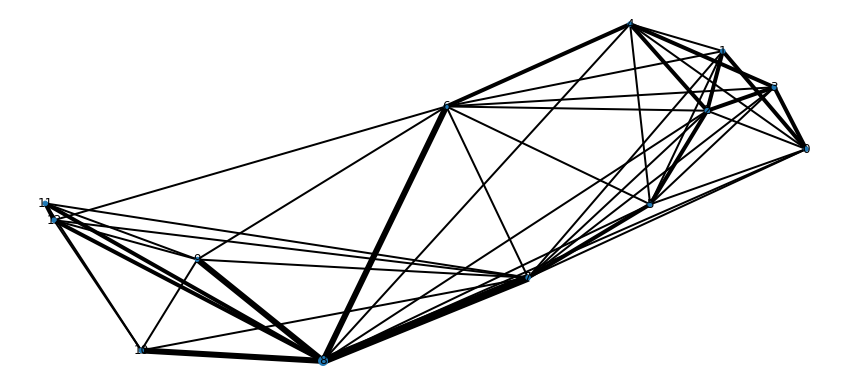

In [174]:
# Draw block model with weighted edges and nodes sized by number of internal nodes
node_size = [BM.nodes[x]["nnodes"] * 10 for x in BM.nodes()]
edge_width = [(2 * d["weight"]) for (u, v, d) in BM.edges(data=True)]
# Set positions to mean of positions of internal nodes from original graph
posBM = {}
for n in BM:
        xy = np.array([pos[u] for u in BM.nodes[n]["graph"]])
        posBM[n] = xy.mean(axis=0)

print("Block Model")
plt.figure(figsize=(15,15))
plt.subplot(212)
nx.draw(BM, posBM, node_size=node_size, width=edge_width, with_labels=True)
plt.axis("off")
plt.show()

## Island Method